# Python Visualization

In [2]:
# imports
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod3/M3-Final-Project/Mod3-Project-Theme-Park-Analytics/data/themepark.db'
connection = sqlite3.connect(path)
cursor = connection.cursor()

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_98461/3052620785.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df1, x='day_name', y='day_revenue', palette='colorblind')


Text(0.5, 1.0, 'Ticket Revenue per Day of Week')

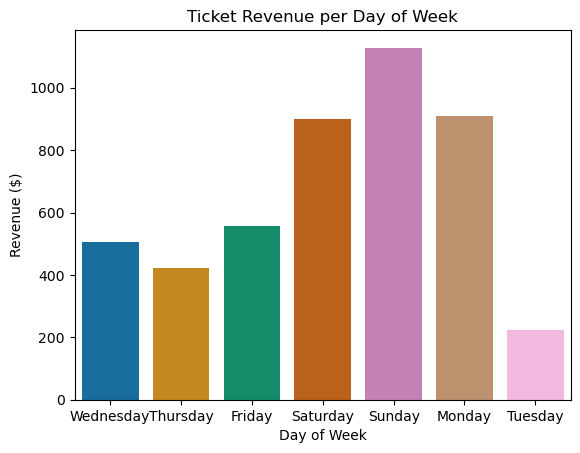

In [72]:
# Query 1 Figure

query1 = """WITH table_join AS (
SELECT visit_date, day_name, SUM(CAST(spend_cents_clean AS REAL)/100)  AS daily_revenue
FROM fact_visits v
LEFT JOIN dim_date d ON v.date_id = d.date_id
GROUP BY visit_date
)
SELECT visit_date, day_name, COALESCE(daily_revenue, 0.0) AS day_revenue,
COALESCE(LAG(daily_revenue, 1) OVER (ORDER BY visit_date),0.0) AS previous_day_revenue,
SUM(daily_revenue) OVER (
ORDER BY visit_date ASC) AS running_total
FROM table_join
GROUP BY visit_date;"""

df1 = pd.read_sql_query(query1, connection)
df1 = df1.iloc[1:8]

sns.barplot(df1, x='day_name', y='day_revenue', palette='colorblind')
plt.ylabel('Revenue ($)')
plt.xlabel('Day of Week')
plt.title('Ticket Revenue per Day of Week')

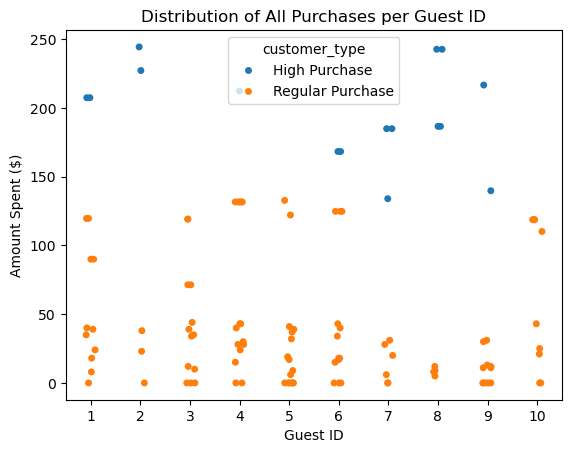

In [73]:
# Query 2 Figure

query2 = """WITH ee AS (
SELECT g.guest_id, CONCAT(g.first_name, ' ', g.last_name) AS guest_name, ROUND(spend_dollar,2) AS spend_dollars, ROUND((p.amount_cents_clean/100),2) AS amount_dollar_clean
FROM fact_purchases p
LEFT JOIN fact_visits v ON p.visit_id = v.visit_id
LEFT JOIN dim_guest g ON v.guest_id = g.guest_id
),
dd AS (
SELECT *,
guest_name, spend_dollars,
ROUND(AVG(spend_dollars) OVER (PARTITION BY guest_name ORDER BY guest_name)) AS rounded
FROM ee
)
SELECT guest_id, spend_dollars,
CASE
			WHEN spend_dollars >= 133.94 THEN 'High Purchase'			--3rd quartile
			ELSE 'Regular Purchase'
			END customer_type
FROM dd

UNION ALL 
SELECT guest_id, amount_dollar_clean, 
CASE
			WHEN amount_dollar_clean >= 133.94 THEN 'High Purchase'			--3rd quartile
			ELSE 'Regular Purchase'
			END customer_type
FROM dd

"""

df2 = pd.read_sql_query(query2, connection)
sns.stripplot(df2, x='guest_id', y='spend_dollars', hue='customer_type')
plt.xlabel('Guest ID')
plt.ylabel('Amount Spent ($)')
plt.title('Distribution of All Purchases per Guest ID')
#plt.axhline(y=133.94, color='black', linestyle='--', label='High Purchase ($133.94)')
plt.show()

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_98461/2226064779.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df2, x='attraction_name', y='satisfaction_rating', palette='colorblind')


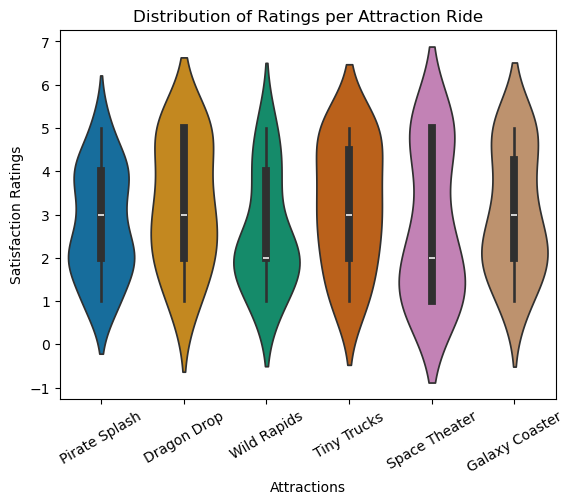

In [81]:

# Query 3 Figure

query2 = """
SELECT e.attraction_id, attraction_name, satisfaction_rating
FROM fact_ride_events e
INNER JOIN dim_attraction a  ON e.attraction_id = a.attraction_id
"""

df2 = pd.read_sql_query(query2, connection)
sns.violinplot(df2, x='attraction_name', y='satisfaction_rating', palette='colorblind')
plt.xlabel('Attractions')
plt.ylabel('Satisfaction Ratings')
plt.title('Distribution of Ratings per Attraction Ride')
plt.xticks(rotation=30)
plt.show()